In [1]:
import pandas as pd

### Создание DataFrame с нуля
Существует множество способов создать DataFrame, однако, сейчас мы создадим его из словаря.

Создадим таблицу покупателей, и сколько купил каждый из них яблок и апельсинов.

In [2]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

Передадим в конструктор DataFrame:

In [3]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**Что происходит?**

Каждая пара *(ключ, значение)* в `data` стала *столбцом* в итоговом DataFrame.

**Индексы** в этом DataFrame автоматически создан как числа 0-3, но мы можем задать свои.

Дадим покупателям имена:

In [4]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Теперь мы можем найти строку, индексом которой будет имя, используя `.loc[]`:

In [5]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

## Чтение из файла

### Чтение из CSV


In [6]:
df = pd.read_csv('purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Однако, в CSV не указано, какой столбец является индексом. Это можно задать через аргумент `index_col`:

In [7]:
df = pd.read_csv('purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Чтение из JSON


In [8]:
df = pd.read_json('purchases.json')

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


В самой структуре файла указаны индексы:
```json
{
    "apples":
    {
        "June":3,
        "Robert":2,
        "Lily":0,
        "David":1
     },
     "oranges":
     {
         "June":0,
         "Robert":3,
         "Lily":7,
         "David":2}
     }
}
```


###  Сохранение в CSV, JSON



In [9]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')



## Перейдём к делу:

Рассмотрим основы работы с данными с помощью таблицы фильмов из Кинопоиска за 2016 год:

In [10]:
movies_df = pd.read_csv("kp_all_movies.csv", index_col="name_eng")

### Осмотр данных

Открыть несколько первых строк и увидеть их можно с помощью `.head()`:

In [11]:
movies_df.head()

,Movie_id,Name_rus,kp_rating,runtime,kp_rating_count,movie_year,Imdb_rating,imdb_rating_count,genres,countries,cost,Critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],$1 250 000,94.0
Chûshingura,100049,47 ронинов,7.660,204,297.0,1962,7.8,1496.0,"[боевик, драма, история]",[Япония],NaN,NaN
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],$575 000,100.0
Onmyoji 2,100053,Колдун 2,7.745,113,109.0,2003,6.5,393.0,"[фэнтези, боевик]",[Япония],NaN,NaN
Ilsa the Tigress of Siberia,100096,"Ильза, тигрица из Сибири",4.286,85,151.0,1977,4.9,1211.0,[ужасы],[Канада],CAD 250 000,NaN


**Последние** строки можно увидеть с помощью `.tail()`. `tail()` можно так же передать число - количество строк, которые хотим увидеть:

In [12]:
movies_df.tail(2)

,Movie_id,Name_rus,kp_rating,runtime,kp_rating_count,movie_year,Imdb_rating,imdb_rating_count,genres,countries,cost,Critics_rating
name_eng,,,,,,,,,,,,
Young Mr. Lincoln,9994,Молодой мистер Линкольн,7.073,100,196.0,1939,7.7,5000.0,"[драма, биография]",[США],$1 500 000,100.0
Kohayagawa-ke no aki,99944,Осень в семействе Кохаягава,7.452,103,146.0,1961,8.0,2190.0,[драма],[Япония],NaN,NaN


### Получить общую информацию о датасете

`.info()`

In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36417 entries, Jezebel to Kohayagawa-ke no aki
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_id           36417 non-null  int64  
 1   Name_rus           36417 non-null  object 
 2   kp_rating          36416 non-null  float64
 3   runtime            36417 non-null  object 
 4   kp_rating_count    36416 non-null  float64
 5   movie_year         36417 non-null  int64  
 6   Imdb_rating        33131 non-null  float64
 7   imdb_rating_count  33131 non-null  float64
 8   genres             36307 non-null  object 
 9   countries          36417 non-null  object 
 10  cost               11002 non-null  object 
 11  Critics_rating     11564 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 3.6+ MB


In [14]:
movies_df.shape

(36417, 12)

### Работа с дублированными данными

В нашемем датасете нету дубликатов строк, но важно убрать их в случае, если они есть.

Чтобы увидеть, как работать с дубликатами, удвоем датасет и устраним дублирование:

In [15]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(72834, 12)

`append()` возвращает копию датасета, не меняя оригинал.

С помощью `.shape` можно увидеть, что датасет и правда удвоен.

Теперь можно удалить дубликаты.

In [16]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(36417, 12)

Как и `append()`, `drop_duplicates()` вернёт копию DataFrame, но убрав дубликаты. 
Используя `inplace=True`  мы применем метод на текущий DataFrame:

In [17]:
temp_df.drop_duplicates(inplace=True)

### Работа с именами столбцов 

Вывести список названий солбцов:

In [18]:
movies_df.columns

Index(['Movie_id', 'Name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'Imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'Critics_rating'],
      dtype='object')

Используя `.rename()` мы можем переназвать конкретные столбцы передав `dict`:

In [19]:
movies_df.rename(columns={
        'movie_duration': 'Runtime', 
        'budget': 'cost'
    }, inplace=True)


movies_df.columns

Index(['Movie_id', 'Name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'Imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'Critics_rating'],
      dtype='object')

Если мы хотим изменить все имена, то можем передать список. Например, если мы хотим все имена в нижнем регистре:

In [20]:
movies_df.columns = ['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating']


movies_df.columns

Index(['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating'],
      dtype='object')

Или, немного автоматизируя:

In [21]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating'],
      dtype='object')

### Работа с пропущенными значениями
Работая с данными, вы скорее всего столкнётесь с тем, что часть значений пропущена


Давайте найдём, сколько пропущенных значений в каждом из столбцов. Сначала, создадим таблицу, где пропущенное значение становится True, а иные - False:

In [22]:
movies_df.isnull()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,False,False,False,False,False,False,False,False,False,False,False,False
Chûshingura,False,False,False,False,False,False,False,False,False,False,True,True
You Only Live Once,False,False,False,False,False,False,False,False,False,False,False,False
Onmyoji 2,False,False,False,False,False,False,False,False,False,False,True,True
Ilsa the Tigress of Siberia,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
War and Peace,False,False,False,False,False,False,False,False,False,False,False,False
Ningen no joken II,False,False,False,False,False,False,False,False,False,False,True,True
Shûbun,False,False,False,False,False,False,False,False,False,False,True,True


Теперь, просуммируем. True будет считаться за 1, False за ноль:

In [23]:
movies_df.isnull().sum()

movie_id                 0
name_rus                 0
kp_rating                1
runtime                  0
kp_rating_count          1
movie_year               0
imdb_rating           3286
imdb_rating_count     3286
genres                 110
countries                0
cost                 25415
critics_rating       24853
dtype: int64

#### Убрать все пропущенные значения

Убрать все строки, в которых есть Nan:

In [24]:
movies_df.dropna()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],$1 250 000,94.0
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],$575 000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],$4 000 000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],$1 140 000,75.0
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],$15 000 000,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Ulee's Gold,9948,Золото Ули,6.533,113,113.0,1996,7.1,5551.0,[драма],[США],$2 700 000,94.0
Fedora,9955,Федора,7.490,114,313.0,1978,6.9,2222.0,"[драма, мелодрама]","[Франция, Германия (ФРГ)]",$6 727 000,73.0
"Yours, Mine and Ours",9967,"Твои, мои и наши",7.339,111,149.0,1968,7.1,5570.0,"[комедия, семейный]",[США],$2 500 000,44.0


Убрать все столбцы, в которых есть Nan:

In [25]:
movies_df.dropna(axis=1)

,movie_id,name_rus,runtime,movie_year,countries
name_eng,,,,,
Jezebel,10000,Иезавель,104,1938,[США]
Chûshingura,100049,47 ронинов,204,1962,[Япония]
You Only Live Once,10005,Живем один раз,86,1937,[США]
Onmyoji 2,100053,Колдун 2,113,2003,[Япония]
Ilsa the Tigress of Siberia,100096,"Ильза, тигрица из Сибири",85,1977,[Канада]
...,...,...,...,...,...
War and Peace,9980,Война и мир,208,1956,"[США, Италия]"
Ningen no joken II,99807,Удел человеческий 2,181,1959,[Япония]
Shûbun,99886,Скандал,105,1950,[Япония]


In [26]:
movies_df.dropna(inplace=True)

### Очистка данных
Часто сами значения в датасете будут в неправильном формате.
Уберём все строки, в которых значение бюджета не в долларах, и переформатируем:

In [27]:
movies_df['cost'][0]

'$1\xa0250\xa0000'

In [28]:
movies_df = movies_df[movies_df['cost'].str.startswith('$')]

In [29]:
movies_df['cost'] = movies_df['cost'].str.replace('$', '').str.replace(',', '').str.split().str.join('')

In [30]:
movies_df['cost'][0]

'1250000'

In [31]:
movies_df['cost'] = pd.to_numeric(movies_df['cost'])

Используя квадратные скобки можно получить значения столбца отдельно. Получить столбец бюджета:

In [32]:
cost = movies_df['cost']

In [33]:
cost.head()

name_eng
Jezebel                1250000
You Only Live Once      575000
Exodus                 4000000
Boomerang!             1140000
Hoot                  15000000
Name: cost, dtype: int64

Можно применять операции на отдельный столбец так же, как и на DataFrame:

In [34]:
cost_mean = cost.mean()

cost_mean

27915390.3082732

### Анализ значений

Используя `describe()` на весь DataFrame,мы получим сводную информацию о распределении по численным столбцам:

In [35]:
movies_df.describe()

,movie_id,kp_rating,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,cost,critics_rating
count,5959.000000,5959.000000,5959.000000,5959.00000,5959.000000,5.959000e+03,5.959000e+03,5959.000000
mean,162729.931029,6.760067,18899.427756,1996.60245,6.457677,6.927039e+04,2.791539e+07,55.863903
std,230631.805216,0.872491,36002.772501,17.37740,1.075568,1.200636e+05,3.644698e+07,28.826997
min,298.000000,1.574000,100.000000,1914.00000,1.500000,2.210000e+02,2.200000e+02,0.000000
25%,5006.000000,6.256500,819.000000,1991.00000,5.800000,8.251500e+03,5.000000e+06,31.000000
50%,17579.000000,6.858000,4173.000000,2002.00000,6.600000,2.568600e+04,1.500000e+07,58.000000
75%,279789.000000,7.386500,19919.500000,2008.00000,7.200000,7.667500e+04,3.500000e+07,82.000000
max,918112.000000,9.120000,401542.000000,2016.00000,9.300000,1.572615e+06,3.000000e+08,100.000000


`.describe()` можно так же применить и на категориальный столбец:

In [36]:
movies_df['genres'].describe()

count        5959
unique       1113
top       [драма]
freq          297
Name: genres, dtype: object

Это говорит нам, что в "жанровом" столбце 5959 строк, чаще всего есть "драма", которая встретилась 297 раз.
 
`.value_counts()` покажет встречаемость каждого из значений:

In [37]:
movies_df['genres'].value_counts().head(10)

[драма]                        297
[драма, мелодрама, комедия]    237
[комедия]                      230
[драма, комедия]               202
[драма, мелодрама]             191
[мелодрама, комедия]           181
[триллер, драма, криминал]     125
[ужасы, триллер]               112
[триллер, драма]                92
[ужасы]                         87
Name: genres, dtype: int64

#### Отношения между столбцами

С помощью метода коррелиации `.corr()` мы можем найти коррелиации между всеми столбцами:

In [38]:
movies_df.corr()

,movie_id,kp_rating,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,cost,critics_rating
movie_id,1.000000,-0.249770,0.114138,0.550315,-0.105313,0.039179,0.093751,-0.115148
kp_rating,-0.249770,1.000000,0.370535,-0.237535,0.801245,0.386041,0.131057,0.517260
kp_rating_count,0.114138,0.370535,1.000000,0.211636,0.291264,0.870002,0.512139,0.124000
movie_year,0.550315,-0.237535,0.211636,1.000000,-0.290331,0.133345,0.311505,-0.373477
imdb_rating,-0.105313,0.801245,0.291264,-0.290331,1.000000,0.386033,-0.014490,0.774247
imdb_rating_count,0.039179,0.386041,0.870002,0.133345,0.386033,1.000000,0.457161,0.246775
cost,0.093751,0.131057,0.512139,0.311505,-0.014490,0.457161,1.000000,-0.115875
critics_rating,-0.115148,0.517260,0.124000,-0.373477,0.774247,0.246775,-0.115875,1.000000


### Slicing, selecting, extracting

Слайсинг, выбор и извлечение данных.

#### По столбцу:

In [39]:
genre_col = movies_df['genres']

type(genre_col)

pandas.core.series.Series

Вернётся объект *Series*. Чтобы извлечь *DataFrame*, нужно передать список имён:

In [40]:
genre_col = movies_df[['genres']]

type(genre_col)

pandas.core.frame.DataFrame

Выборка нескольких столбцов

In [41]:
subset = movies_df[['genres', 'imdb_rating']]

subset.head()

,genres,imdb_rating
name_eng,,
Jezebel,"[драма, мелодрама]",7.6
You Only Live Once,"[фильм-нуар, драма, криминал]",7.4
Exodus,"[боевик, драма, военный, история]",6.8
Boomerang!,"[фильм-нуар, драма, криминал]",7.3
Hoot,"[комедия, приключения, семейный]",5.6


#### По строкам

Есть два основных метода: 

- `.loc` - нахождение по имени индекса
- `.iloc`- нахождение по цифровому индексу


In [42]:
prom = movies_df.loc["You Only Live Once"]

prom

movie_id                                     10005
name_rus                            Живем один раз
kp_rating                                    7.168
runtime                                         86
kp_rating_count                                330
movie_year                                    1937
imdb_rating                                    7.4
imdb_rating_count                             3812
genres               [фильм-нуар, драма, криминал]
countries                                    [США]
cost                                        575000
critics_rating                                 100
Name: You Only Live Once, dtype: object

In [43]:
prom = movies_df.iloc[1]

In [44]:
prom

movie_id                                     10005
name_rus                            Живем один раз
kp_rating                                    7.168
runtime                                         86
kp_rating_count                                330
movie_year                                    1937
imdb_rating                                    7.4
imdb_rating_count                             3812
genres               [фильм-нуар, драма, криминал]
countries                                    [США]
cost                                        575000
critics_rating                                 100
Name: You Only Live Once, dtype: object

Слайсинг в `loc` и `iloc` почти такой же, как и в обычных списках:

In [45]:
movie_subset = movies_df.loc['You Only Live Once':'Hoot']

movie_subset = movies_df.iloc[1:4]

movie_subset

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0


#### Выбор по условию
Выбор всех фильмов, созданных при участии США

In [46]:
movies_df['countries']

name_eng
Jezebel                                     [США]
You Only Live Once                          [США]
Exodus                                      [США]
Boomerang!                                  [США]
Hoot                                        [США]
                                  ...            
Ulee's Gold                                 [США]
Fedora                  [Франция, Германия (ФРГ)]
Yours, Mine and Ours                        [США]
War and Peace                       [США, Италия]
Young Mr. Lincoln                           [США]
Name: countries, Length: 5959, dtype: object

In [47]:
condition = (movies_df['countries'].str.contains("США"))

condition.head()

name_eng
Jezebel               True
You Only Live Once    True
Exodus                True
Boomerang!            True
Hoot                  True
Name: countries, dtype: bool

In [48]:
movies_df[condition].head(10)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],15000000,26.0
Suspicion,1006,Подозрение,7.508,99,2146.0,1941,7.5,22794.0,"[триллер, детектив]",[США],1800000,100.0
Christmas Vacation,10074,Рождественские каникулы,7.154,97,6694.0,1989,7.6,98361.0,"[комедия, семейный]",[США],27000000,64.0
Tora! Tora! Tora!,10079,Тора! Тора! Тора!,7.544,144,803.0,1970,7.5,24305.0,"[военный, история, боевик, драма]","[Япония, США]",25000000,59.0
Running on Empty,10105,На холостом ходу,7.633,116,531.0,1988,7.7,9725.0,"[драма, мелодрама, криминал, музыка]",[США],3000000,85.0


In [49]:
movies_df[movies_df['kp_rating'] >= 8.6].head(3)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
The Lion King,2360,Король Лев,8.789,89,247686.0,1994,8.5,617210.0,"[мультфильм, мюзикл, драма, приключения, семей...",[США],45000000,90.0
Interstellar,258687,Интерстеллар,8.609,169,282092.0,2014,8.6,828508.0,"[фантастика, драма, приключения]","[США, Великобритания]",165000000,72.0
The Godfather,325,Крестный отец,8.744,175,161481.0,1972,9.2,1104636.0,"[драма, криминал]",[США],6000000,99.0


Можно так же использовать логические знаки:

In [50]:
movies_df[(movies_df['countries'].isin(["США"])) | (movies_df['kp_rating'] >= 8.6)].head()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
The Lion King,2360,Король Лев,8.789,89,247686.0,1994,8.5,617210.0,"[мультфильм, мюзикл, драма, приключения, семей...",[США],45000000,90.0
Interstellar,258687,Интерстеллар,8.609,169,282092.0,2014,8.6,828508.0,"[фантастика, драма, приключения]","[США, Великобритания]",165000000,72.0
The Godfather,325,Крестный отец,8.744,175,161481.0,1972,9.2,1104636.0,"[драма, криминал]",[США],6000000,99.0
The Shawshank Redemption,326,Побег из Шоушенка,9.120,142,376610.0,1994,9.3,1572615.0,"[драма, криминал]",[США],25000000,91.0
Schindler's List,329,Список Шиндлера,8.819,195,187138.0,1993,8.9,823247.0,"[драма, биография, история]",[США],22000000,96.0


Найти все фильмы, начиная с 2005 до 2010, с рейтингом выше 8 баллов или с бюджетом ниже миллиона долларов. 

In [51]:
movies_df[
    (((movies_df['movie_year'] >= 2005) & (movies_df['movie_year'] <= 2010))
    & (movies_df['imdb_rating'] > 8.0))
    | (movies_df['cost'] < 1000000)
]

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0
The Pawnbroker,10120,Ростовщик,7.549,116,261.0,1964,7.8,5762.0,[драма],[США],500000,100.0
Topper,1017,Топпер,6.668,97,146.0,1937,7.4,4921.0,"[фэнтези, мелодрама, комедия]",[США],500000,94.0
Alexis Zorbas,10198,Грек Зорба,7.844,142,658.0,1964,7.8,14752.0,"[драма, приключения]","[Греция, США]",783000,86.0
When Worlds Collide,102864,Когда сталкиваются миры,5.802,83,240.0,1951,6.7,5011.0,"[фантастика, семейный]",[США],936000,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Killer's Kiss,9694,Поцелуй убийцы,6.684,67,1372.0,1954,6.7,15039.0,"[фильм-нуар, триллер, драма, криминал]",[США],75000,84.0
I Call First,9734,Кто стучится в дверь ко мне?,6.943,90,583.0,1967,6.8,5404.0,"[драма, мелодрама]",[США],75000,71.0
"The Beast from 20,000 Fathoms",9795,Чудовище с глубины 20000 морских саженей,6.462,80,258.0,1953,6.7,4522.0,"[ужасы, фантастика, приключения]",[США],210000,94.0


## Примение функций на данные

Мы можем проходить по датасету итеративно, с помощью цикла, однако более эффективным и простым будет использовать `.apply()`
Создадим функцию, которая будет делить фильмы на "хорошие" и "плохие".

In [52]:
def rating_function(x):
    if x >= 7.0:
        return "хороший"
    else:
        return "плохой"

In [53]:
movies_df["rating_category"] = movies_df["imdb_rating"].apply(rating_function)

movies_df.head(5)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating,rating_category
name_eng,,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0,хороший
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0,хороший
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0,плохой
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0,хороший
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],15000000,26.0,плохой


Точно так же можно использовать и лямда-функции.

In [54]:
movies_df["rating_category"] = movies_df["imdb_rating"].apply(lambda x: 'хороший' if x >= 7.0 else 'плохой')

movies_df.head(3)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating,rating_category
name_eng,,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0,хороший
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0,хороший
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0,плохой


## Построение графиков

Кроме того, `pandas` имеет встроенную интеграцию с `matplotlib`. Воспользуемся этим:

In [55]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # установим шрифт и размер больше

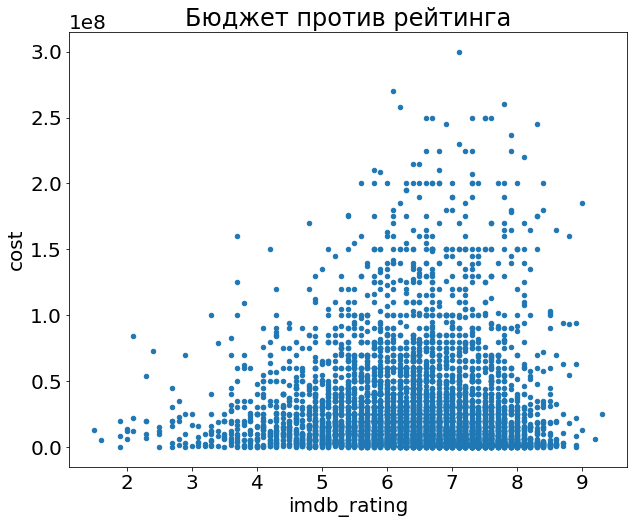

In [56]:
movies_df.plot(kind='scatter', x='imdb_rating', y='cost', title='Бюджет против рейтинга');

Построим гистограмму относительно одного столбца:

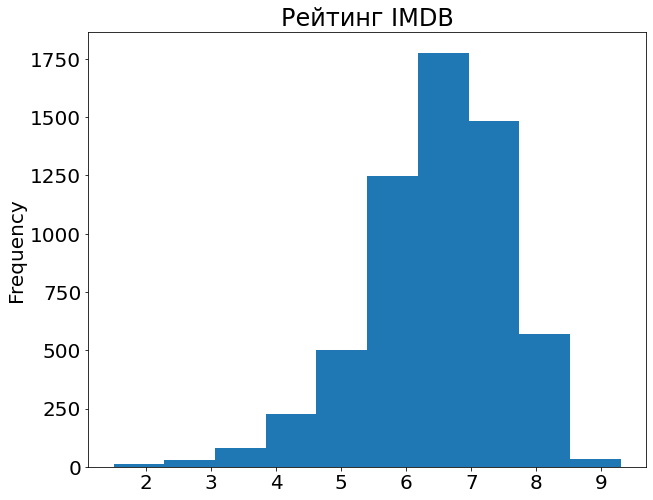

In [57]:
movies_df['imdb_rating'].plot(kind='hist', title='Рейтинг IMDB');

Построим ящик с усами:

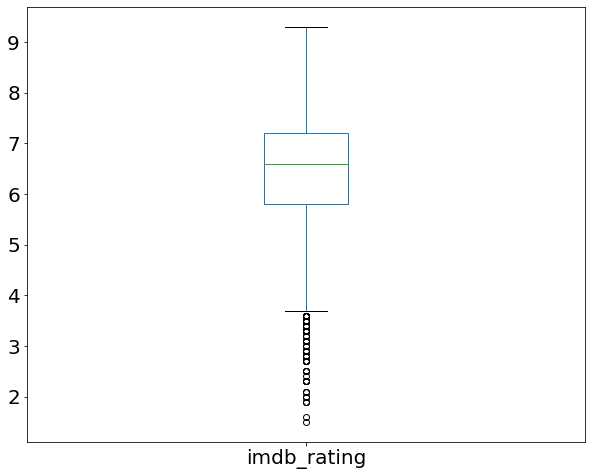

In [58]:
movies_df['imdb_rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


Комбинируя категориальные и численные данные, мы можем построить распределение для "хорошего" и "плохого"

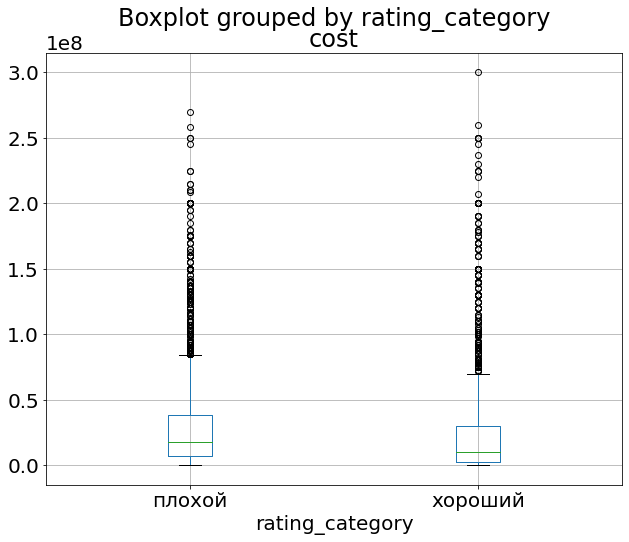

In [59]:
movies_df.boxplot(column='cost', by='rating_category');